Project 1: Cardio Good Fitness
Objective: Explore the dataset to identify differences between the customers of
 each product.
You can also explore relationships between the different attributes of the customers.
1. Come up with a customer profile of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in 
    targeting new customers.

Created on Tue Aug  9 14:38:19 2022

@author: APremani

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in file into data frame
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/CardioGoodFitness.csv')

In [ ]:
# Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Total columns are 180. Since all entries at 180 non-null, we see that no columns have any null data entries, so we move on...

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


 We see that the mean age of the data group is 28.79 years old with a std dev 
 of 6.9 years. 75% of the population are below (inclusive) the age of 33, which is interesting.
 The mean income is \$53.7k and 75% of the population earn below $58.6k.
 The mean Fitness rating is 3.3/5 and 75% of the population rated themselves 
 at including or below 4 out of 5.
 On average, customers think they will use the product 3.4 times per week.
 Customers expect to run 103 miles on average.
 
 Some questions to ask:

     1. Relationship between Fitness and Miles expected to run
     2. Relationship between Income and Fitness+Miles
     3. Relationship between Age and Fitness+Miles
     4. Relationship between Education and Fitness+Miles
     5. Relationship between Usage and Miles by Product
     6. Relationship between Marital Status and Fitness/Miles
     7. Relationship between Gender and Fitness/Miles
     8. Product Profile


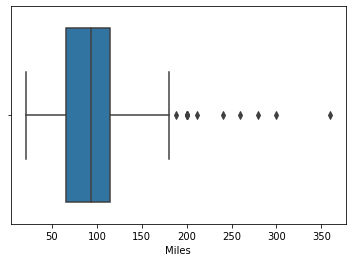

In [ ]:
# Univariate Analysis of Miles
sns.boxplot(data=df, x='Miles');

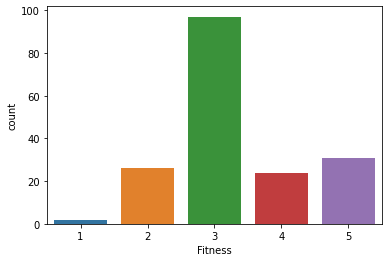

In [ ]:
# Univariate Analysis of Fitness
sns.countplot(data=df, x='Fitness');

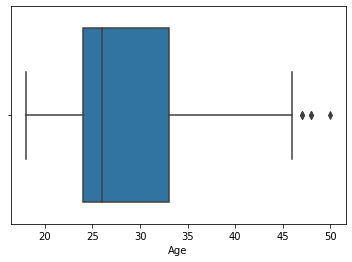

In [ ]:
# Univariate Analysis of Age
sns.boxplot(data=df, x='Age');

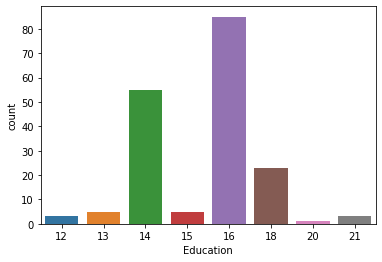

In [ ]:
# Univariate Analysis of Education
sns.countplot(data=df, x='Education');

It is interesting to note that most of the customers have education levels of 14 or 16 years.

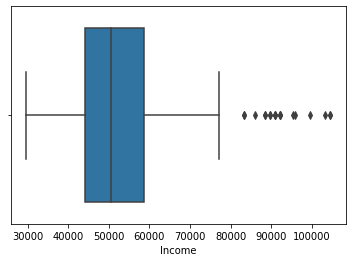

In [ ]:
# Univariate Analysis of Income
sns.boxplot(data=df, x='Income');

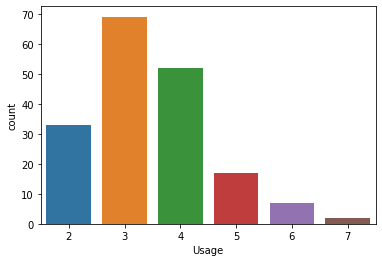

In [ ]:
# Univariate Analysis of Usage
ax=sns.countplot(data=df, x='Usage');

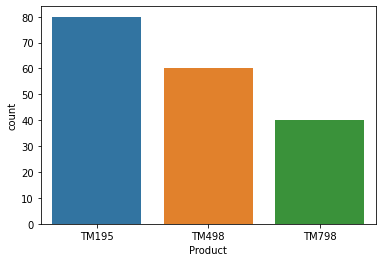

In [ ]:
sns.countplot(data=df, x='Product');

More customers use TM195, TM498 and TM798 in that order, and most customers have a usage rating of 3, 4 and 2 times per week in that order.

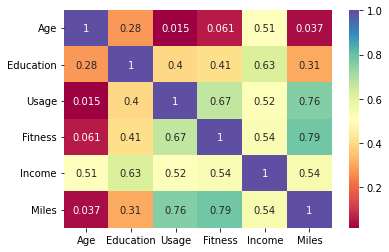

In [ ]:
# Bivariate Analysis - Correlation Map
sns.heatmap(df.corr(), annot=True, cmap='Spectral');

Age has a strong positive correlation with income and Education (weaker so).  but a weak correlation with miles and fitness. This means that the company can target customers of all age groups, since no particular age group is predicted to use the treadmill more.

Usage (times per week): has a strong positive correlation with Fitness, Income and Miles expected to run, and a weaker but still positive correlation with Education. 

Fitness self-rating: has a strong correlation with Income and Miles expected to run.

Income: Has a strong correlation with Miles expected to run. 

Perhaps targeting customers with a higher self fitness rating, income and education will be beneficial; let's explore this more later. Now, let's move to more bivariate customer and product profiling.

Analyzing Fitness:

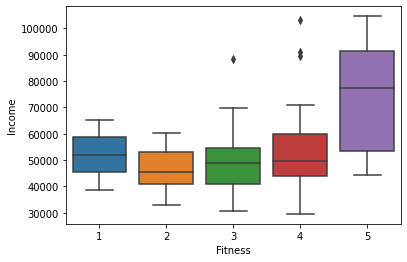

In [14]:
# Income vs Fitness
sns.boxplot(data=df, y='Income', x = 'Fitness');

Customers who have a higher income tend to rate themselves at a higher Fitness level, since mean, median, 25% and 75% of income for Fitness rating of 5 is higher than the rest of the ratings. Between ratings 1-4, we don't see a trend for income levels, which is interesting.

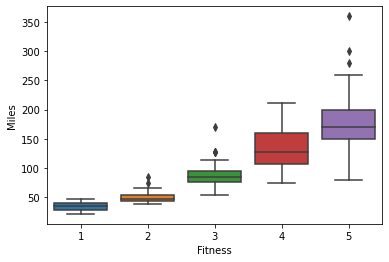

In [ ]:
sns.boxplot(data=df, y='Miles', x='Fitness');

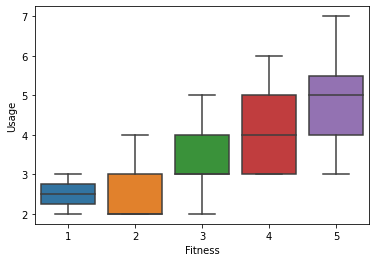

In [24]:
sns.boxplot(data=df, y='Usage', x='Fitness');

As expected, the number of Miles expected to run and usage for a customer increases as the self fitness rating increases.

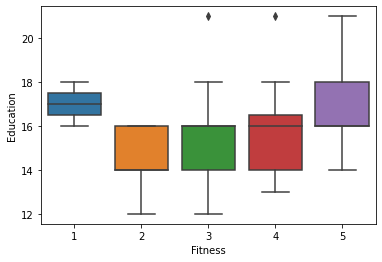

In [ ]:
sns.boxplot(data=df, y='Education', x='Fitness');

We see here that, contrary to what we saw with income vs fitness, higher Education may not tend to increease the customer's self Fitness rating. This is because Fitness=1 and Fitness=5 both have higher education level of 16 and 18 years.

Analysis of Gender and Marital Status:

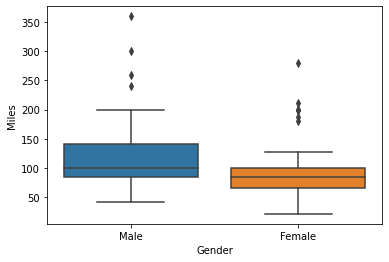

In [ ]:
sns.boxplot(data=df, y='Miles', x='Gender');

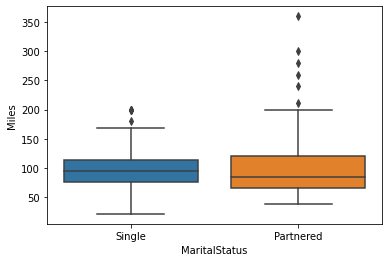

In [ ]:
sns.boxplot(data=df, y='Miles', x='MaritalStatus');

Expected Miles number is higher for Males but is similar for Single vs Partnered customers. However, Partnered customers have a larger spread.

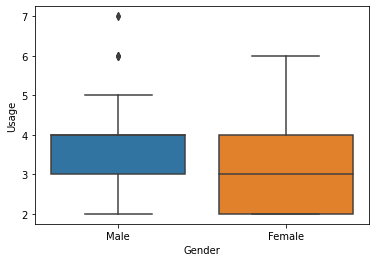

In [ ]:
sns.boxplot(data=df, y='Usage', x='Gender');

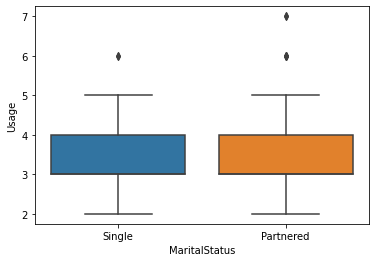

In [ ]:
sns.boxplot(data=df, y='Usage', x='MaritalStatus');

Males tend to use the product more, and Females have a higher spread. But singles and partnered customers tend to use the product the same amount.


Now we look to see the differences between the customers of each product.

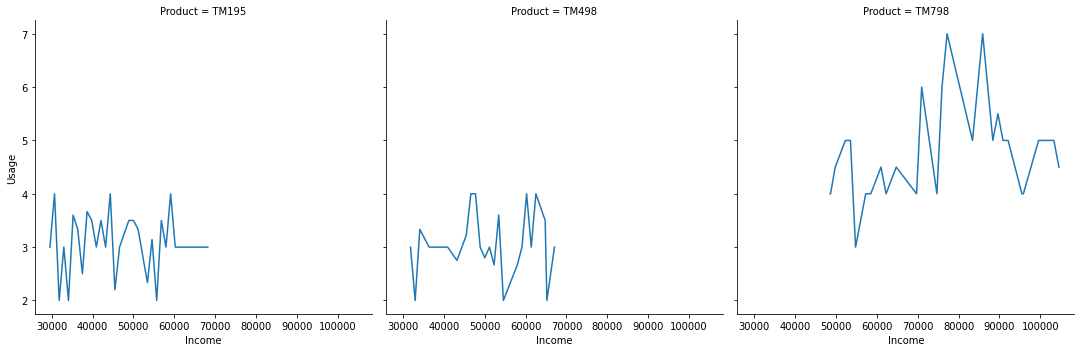

In [9]:
# Usage vs product
sns.relplot(data=df, y='Usage', x='Income', col='Product', kind='line', ci=None, col_wrap=4);

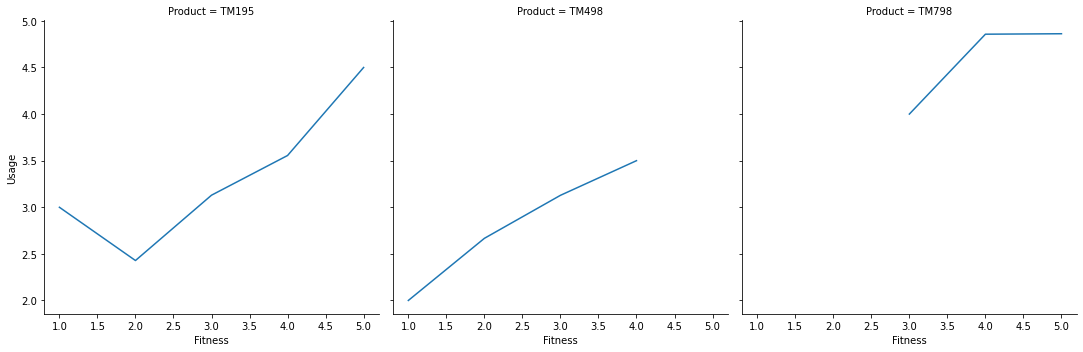

In [21]:
# Usage vs product
sns.relplot(data=df, y='Usage', x='Fitness', col='Product', kind='line', ci=None, col_wrap=4);

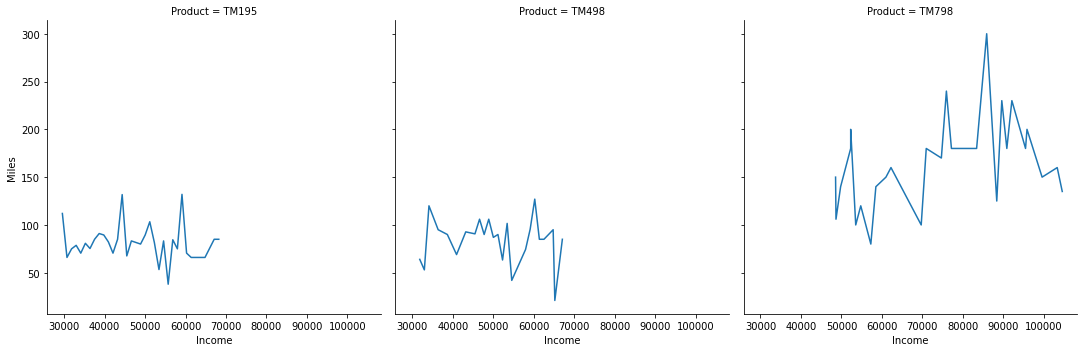

In [20]:
# Miles vs product
sns.relplot(data=df, y='Miles', x='Income', col='Product', kind='line', ci=None, col_wrap=4);

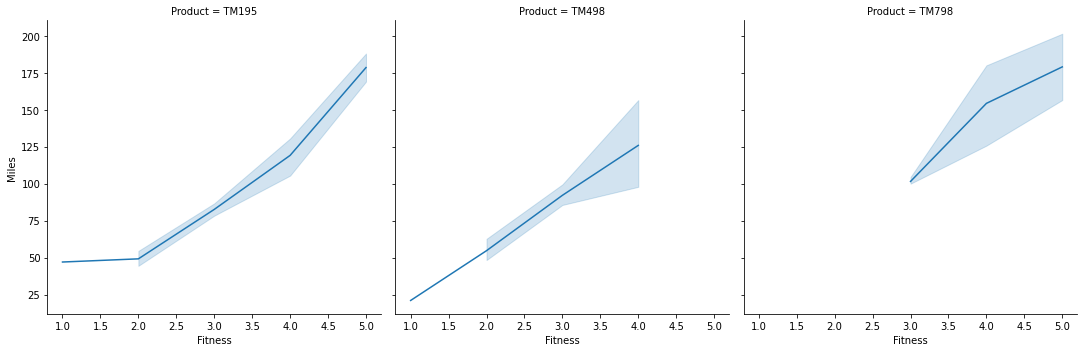

In [23]:
# Usage vs product
sns.relplot(data=df, y='Miles', x='Fitness', col='Product', kind='line', col_wrap=4);

Customers of all income levels generally prefer using TM798 over the other two products. Customers who rate themselves at a 2 or lower Fitness rating tend to use TM195 and TM498, whereas customers who rate at a 3 or higher tend to use TM798 and would use it more times a week than the customers who would use the other two products.

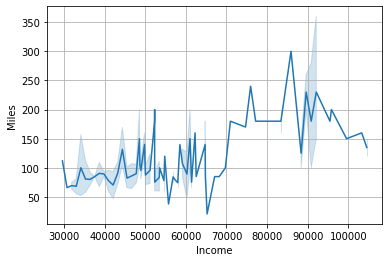

In [ ]:
# Miles vs Income
sns.lineplot(data=df, y='Miles', x= 'Income');
plt.grid()

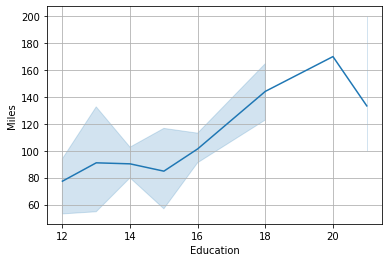

In [ ]:
# Miles vs Education
sns.lineplot(data=df, y='Miles', x= 'Education');
plt.grid()

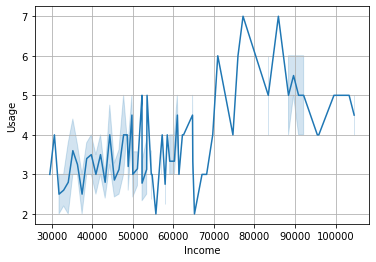

In [ ]:
# Usage vs Income
sns.lineplot(data=df, y='Usage', x= 'Income');
plt.grid()

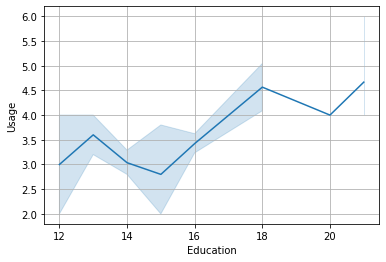

In [ ]:
# Usage vs Education
sns.lineplot(data=df, y='Usage', x= 'Education');
plt.grid()

Number of Miles expected to run and usage increase as:

- years of education increases above 18 years and 
- income of a customer increases above \$70k

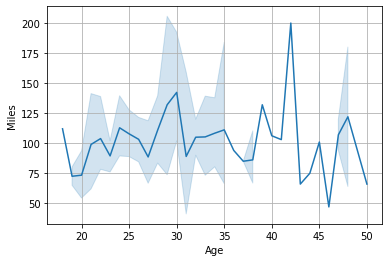

In [ ]:
sns.lineplot(data=df, y='Miles', x= 'Age');
plt.grid()

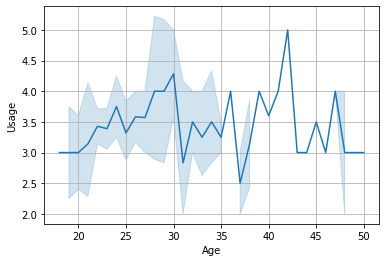

In [ ]:
sns.lineplot(data=df, y='Usage', x= 'Age');
plt.grid()

Age does not tend to impact usage or miles expected to run. This means that age may not be a limiting factor in targeting new customers. However, since 75% of the customers are at or below age 33, we would need more data for ages greater than 33 to make a better conclusion.

It would be beneficial to target customers with higher Income (>\$70k), Education (>16 years) and Fitness level, because customers in those categories are more likely to use the product more times a week and run more miles on it. Customers of all age groups and gender and marital status may be targeted, however males might be seen to use the product more (because of higher spread). It may also be beneficial to have more TM195 in house than the other two, since that product is used more.